In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Conversão imagem para cinza
---







Dimensões da Imagem:3840x2160
Canais de cor:  3


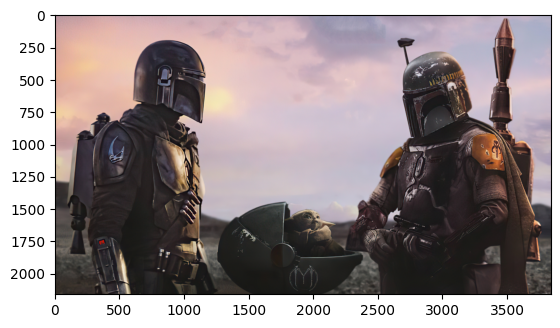

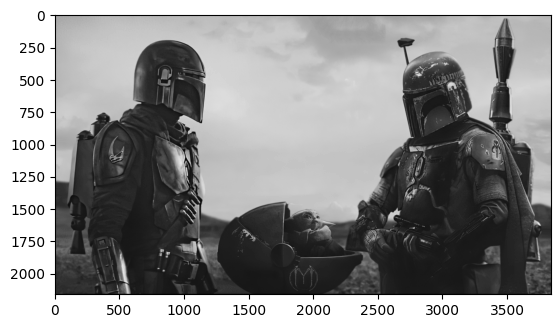

In [ ]:

obj_img = cv2.imread("1.jpg") #carrega a imagem
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB) # Invertendo as cores para mostrar as cores certas
plt.imshow(obj_img) #mostra a imagem
#plt.show()

#Dimensões da imagem
altura, largura, canais_de_cor = obj_img.shape
print("Dimensões da Imagem:" + str(largura) + "x" + str(altura))
print("Canais de cor: ", canais_de_cor)

#Ao invés de fazer uma cópia com a imagem original colorida eu crio uma imagem "vazia"  de mesmo tamanho
imagem_escala_cinza = np.zeros((altura,largura), dtype=np.uint8)#obj_img.copy()

#Escala de cinza simples
#Percorrer cada pixel da imagem
for y in range(0, (altura -1)):
  for x in range(0, (largura - 1)):
    pixel = obj_img[y][x]
    media = sum(pixel) / len(pixel)   #fazer uma média
    imagem_escala_cinza[y][x] = media   #o pixel na posição indicada irá receber a média como valor de RGB

plt.imshow(obj_img)
plt.show()

plt.imshow(imagem_escala_cinza, cmap = 'gray') #como a imagem foi trabalhada na Segmentação de Robson usei o cmap para informar para o OpenCV o tipo de imagem que ele estará trabalhando
plt.show()





#Imagem escala de cinza ponderada








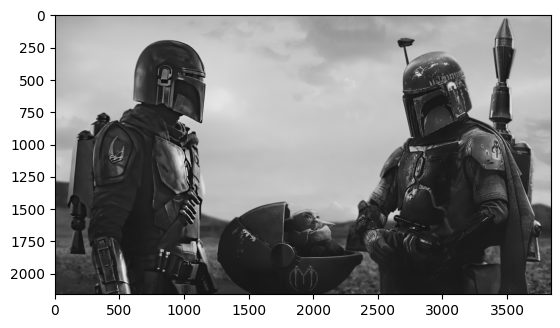

In [ ]:
#Cópia da imagem
imagem_escala_cinza_ponderada = obj_img.copy()

#Percorro cada pixel da imagem
for y in range(0, (altura -1)):
  for x in range(0, (largura - 1)):
    R,G,B = imagem_escala_cinza_ponderada[y][x] #mapeia o R,G,B do pixel
    media_ponderada = (0.299*R + 0.587*G + 0.114*B)# / 3  #calcula a média ponderada
    imagem_escala_cinza_ponderada[y][x] = media_ponderada #insere o valor no pixel

#Exibe a imagem resultante
plt.imshow(imagem_escala_cinza_ponderada)
plt.show()

# Isolar canais de cor


---







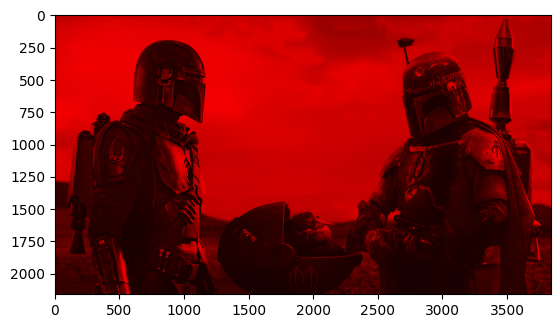

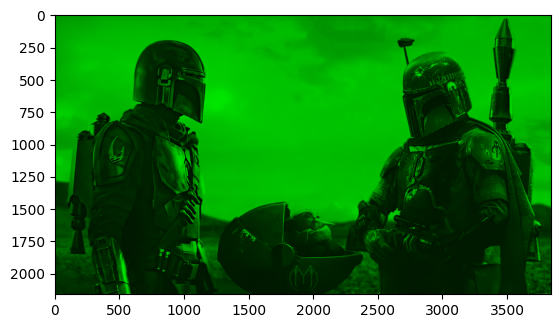

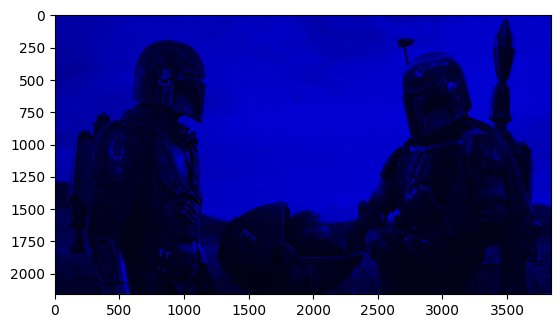

In [ ]:
#isolar canais

#cópia da imagem
imagem_isolada_vermelha = obj_img.copy()

#percorre cada pixel da imagem
for y in range(0, (altura-1)):
  for x in range(0,(largura -1)):
    R,G,B = imagem_isolada_vermelha[y][x] #Mantem R e seta os demais canais para zero
    G = 0
    B = 0
    imagem_isolada_vermelha[y][x] = R,G,B

#mostra a imagem
plt.imshow(imagem_isolada_vermelha)
plt.show()


imagem_isolada_verde = obj_img.copy()

for y in range(0, (altura-1)):
  for x in range(0,(largura -1)):
    R,G,B = imagem_isolada_verde[y][x] #Mantem G e seta os demais canais para zero
    R = 0
    B = 0
    imagem_isolada_verde[y][x] = R,G,B

plt.imshow(imagem_isolada_verde)
plt.show()


imagem_isolada_azul = obj_img.copy()

for y in range(0, (altura-1)):
  for x in range(0,(largura -1)):
    R,G,B = imagem_isolada_azul[y][x] #Mantem B e seta os demais canais para zero
    R = 0
    G = 0
    imagem_isolada_azul[y][x] = R,G,B

plt.imshow(imagem_isolada_azul)
plt.show()



# Soma de Imagens


---








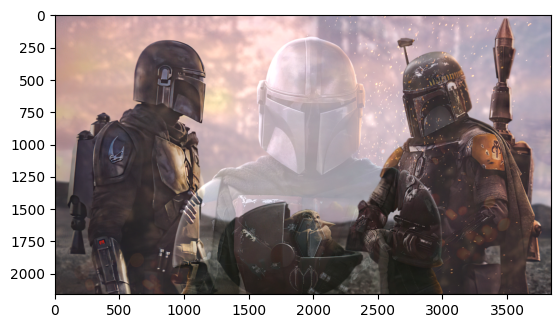

In [ ]:
#soma de imagem

#carrega as duas imagens
img1 = obj_img.copy()
altura1, largura1, canais_de_cor1 = img1.shape

img2 = cv2.imread("2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
altura2, largura2, canais_de_cor2 = img2.shape


#Caso as imagens não tenham o mesmo tamanho torná-las iguais
if((altura1*largura1) >= (altura2*largura2)):
    img2 = cv2.resize(img2, (largura1, altura1))

else:
    img1 = cv2.resize(img1, (largura2, altura2))

soma_imagem = img1.copy() #Usada para setar o tipo de variável ( a imagem não é utilizada)  / Faz a cópia da imagem

#Seta a dureza de cada imagem
dureza_img1 = 0.8
dureza_img2 = 0.5


#Percorre os pixels de cada imagem
for y in range(0, (altura1-1)):
  for x in range(0,(largura1 -1)):
    R1,G1,B1 = img1[y][x]
    R2,G2,B2 = img2[y][x]

    soma_r = R1*dureza_img1 + R2*dureza_img2 #Soma das imagens 'x' a dureza de cada uma
    soma_g = G1*dureza_img1 + G2*dureza_img2
    soma_b = B1*dureza_img1 + B2*dureza_img2

    soma_r = min(soma_r, 255) #para não passar de 255 pegamos o valor mínimo
    soma_g = min(soma_g, 255)
    soma_b = min(soma_b, 255)

    soma_imagem[y][x] = soma_r,soma_g,soma_b

#Mostra resultado
plt.imshow(soma_imagem)
plt.show()






# Soma de imagem com valor escalar


---







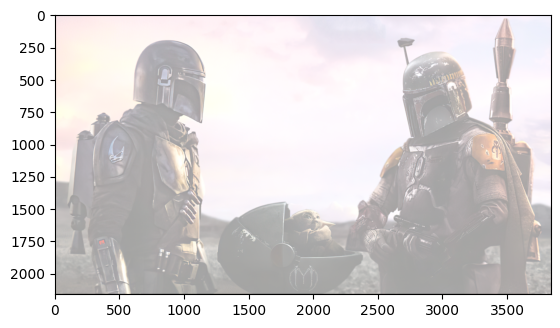

In [ ]:
#soma imagem + escalar

imgpb = obj_img.copy()

soma_imagem_esc = imgpb.copy() #Usada para setar o tipo de variável ( a imagem não é utilizada)

#Setando dureza
dureza_imgpb = 0.5
dureza_esc = 0.6


#Percorre os pixels
for y in range(0, (altura1-1)):
  for x in range(0,(largura1 -1)):
    R1,G1,B1 = imgpb[y][x]

    #mesmo procedimento de soma de imagens
    soma_r = R1*dureza_imgpb + 255*dureza_esc
    soma_g = G1*dureza_imgpb + 255*dureza_esc
    soma_b = B1*dureza_imgpb + 255*dureza_esc

    soma_r = min(soma_r, 255)
    soma_g = min(soma_g, 255)
    soma_b = min(soma_b, 255)

    soma_imagem_esc[y][x] = soma_r,soma_g,soma_b

plt.imshow(soma_imagem_esc)
plt.show()


# Subtração de imagens


---









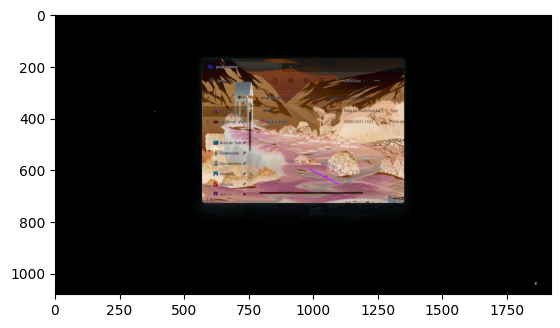

In [ ]:
#subtração

#Carrega as imagens
img3 = cv2.imread("3.png")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
altura3, largura3, canais_de_cor3 = img3.shape

img4 = cv2.imread("4.png")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
altura4, largura4, canais_de_cor4 = img4.shape

#Verifica se possuem o mesmo tamanho, senão ele altera
if((altura3*largura3) >= (altura4*largura4)):
    img4 = cv2.resize(img4, (largura3, altura3))

else:
    img3 = cv2.resize(img3, (largura4, altura4))

#cópia da imagem
subtracao_imagem = img3.copy()

#Percorre a imagem
for y in range(0, (altura3-1)):
  for x in range(0,(largura3 -1)):
    R3,G3,B3 = img3[y][x]
    R4,G4,B4 = img4[y][x]

    #Realiza a subtração
    sub_r = max(R3,R4) - min(R3,R4)
    sub_g = max(G3,G4) - min(G3,G4)
    sub_b = max(B3,B4) - min(B3,B4)

    subtracao_imagem[y][x] = [sub_r,sub_g,sub_b]

plt.imshow(subtracao_imagem)
plt.show()


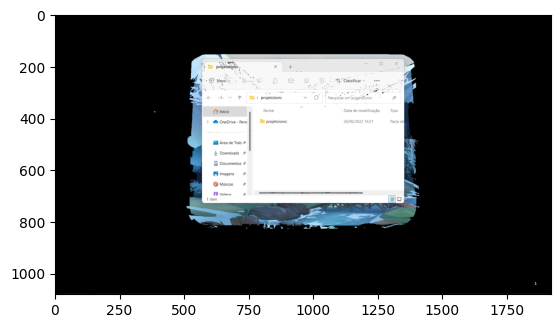

In [ ]:
#subtração

#Carrega as imagens
img3 = cv2.imread("3.png")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
altura3, largura3, canais_de_cor3 = img3.shape

img4 = cv2.imread("4.png")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
altura4, largura4, canais_de_cor4 = img4.shape

#Verifica se possuem o mesmo tamanho
if((altura3*largura3) >= (altura4*largura4)):
    img4 = cv2.resize(img4, (largura3, altura3))

else:
    img3 = cv2.resize(img3, (largura4, altura4))

subtracao_imagem = img3.copy() #Faço uma cópia da imagem

#Seto todos os pixels para preto
for y in range(0, (altura3-1)):
  for x in range(0,(largura3 -1)):
      R,G,B = subtracao_imagem[y][x]
      R=0
      G=0
      B=0
      subtracao_imagem[y][x] = R,G,B

#Percorro a imagem
for y in range(0, (altura3-1)):
  for x in range(0,(largura3 -1)):
    R3,G3,B3 = img3[y][x]
    R4,G4,B4 = img4[y][x]
    #Realizo a subtração
    sub_r = max(R3,R4) - min(R3,R4)
    sub_g = max(G3,G4) - min(G3,G4)
    sub_b = max(B3,B4) - min(B3,B4)
    if( sub_r != 0 and sub_g != 0 and sub_b != 0): #Caso o resultado não for zero, eu seto o pixel no meu resultado
      subtracao_imagem[y][x] = [R4,G4,B4]

plt.imshow(subtracao_imagem)
plt.show()


# Subtração escalar






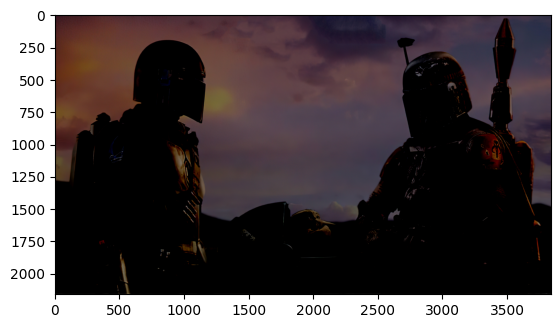

In [ ]:
#subtração escalar
img3 = cv2.imread("1.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
altura3, largura3, canais_de_cor3 = img3.shape

#Cópia da imagem
subtracao_imagem_esc = img3.copy()

#Percorro a imagem
for y in range(0, (altura3-1)):
  for x in range(0,(largura3 -1)):
    R3,G3,B3 = img3[y][x]
    #Realizo a operação
    sub_r = max((R3-127),0)
    sub_g = max((G3-127),0)
    sub_b = max((B3-127),0)

    subtracao_imagem_esc[y][x] = [sub_r,sub_g,sub_b]

plt.imshow(subtracao_imagem_esc)
plt.show()


# Histograma


---


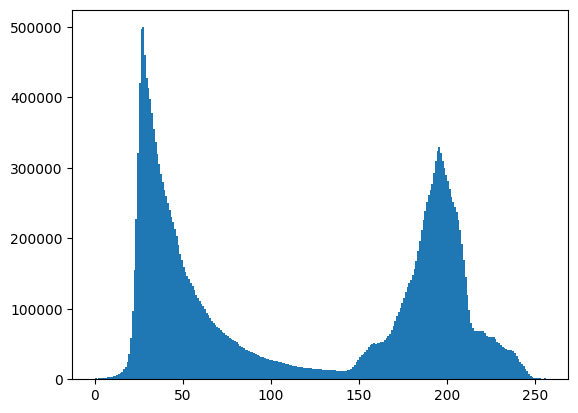

In [ ]:
#Histograma

#histr = cv2.calcHist([img3],[0],None,[256],[0,256])
#plt.plot(histr)
#plt.show()

plt.hist(img3.ravel(),256,[0,256])
plt.show()

# Multiplicação


---







<ipython-input-16-435876a5b44c>:33: RuntimeWarning: overflow encountered in ubyte_scalars
  mult_r = R1*R2
<ipython-input-16-435876a5b44c>:34: RuntimeWarning: overflow encountered in ubyte_scalars
  mult_g = G1*G2
<ipython-input-16-435876a5b44c>:35: RuntimeWarning: overflow encountered in ubyte_scalars
  mult_b = B1*B2


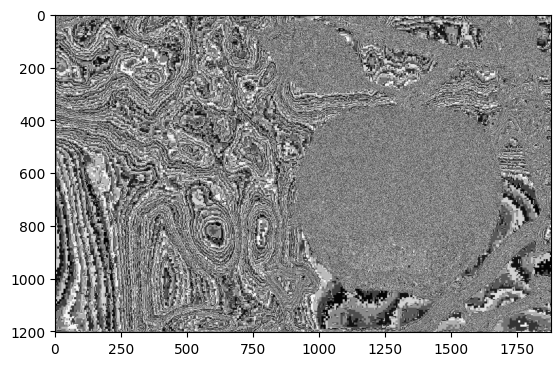

In [ ]:
#multiplicação

#carrega as imagens
img1 = cv2.imread("gray.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("fundo.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#Pega as informações de altura x largura
altura1= img1.shape[0]
largura1= img1.shape[1]

altura2= img2.shape[0]
largura2= img2.shape[1]

#Verifica se as imagens estão com o mesmo tamanho
if((altura1*largura1) >= (altura2*largura2)):
    img2 = cv2.resize(img2, (largura1, altura1))

else:
    img1 = cv2.resize(img1, (largura2, altura2))

mult_img = img1.copy()

#Percorro cada pixel das imagens
for y in range(0, (altura1-1)):
  for x in range(0,(largura1 -1)):
    R1,G1,B1 = img1[y][x]
    R2,G2,B2 = img2[y][x]

    #Realizo a operação
    mult_r = R1*R2
    mult_g = G1*G2
    mult_b = B1*B2

    #Pego o valor mínimo do resultado entre 0 e 255
    mult_r = min(mult_r, 255)
    mult_g = min(mult_g, 255)
    mult_b = min(mult_b, 255)

    mult_img[y][x] = mult_r, mult_g, mult_b

plt.imshow(mult_img)
plt.show()






# Multiplicação escalar


---






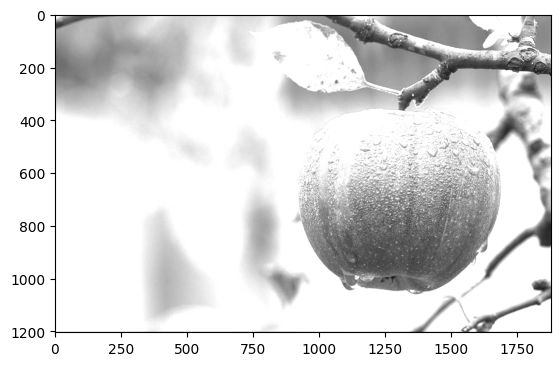

In [ ]:
#multiplicação escalar

img1 = cv2.imread("gray.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

altura1= img1.shape[0]
largura1= img1.shape[1]

mult_img_esc = img1.copy()


for y in range(0, (altura1-1)):
  for x in range(0,(largura1 -1)):
    R1,G1,B1 = img1[y][x]
    mult_r = R1*2
    mult_g = G1*2
    mult_b = B1*2

    mult_r = min(mult_r, 255)
    mult_g = min(mult_g, 255)
    mult_b = min(mult_b, 255)

    mult_img_esc[y][x] = mult_r, mult_g, mult_b

plt.imshow(mult_img_esc)
plt.show()




# Divisão de duas imagens


---







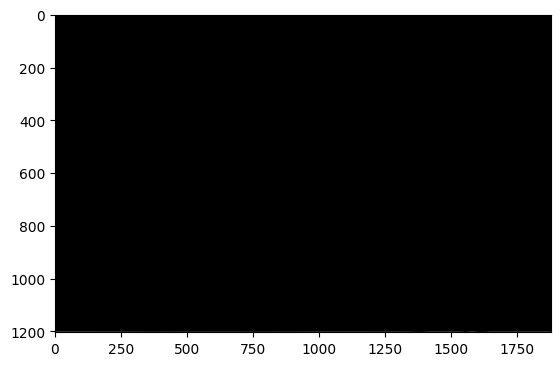

In [ ]:
#divisão

div_img = img1.copy()

#Inicializo as variáveis com zro
div_r, div_g, div_b = 0,0,0

#Percorro cada pixel
for y in range(0, (altura1-1)):
  for x in range(0,(largura1 -1)):
    R1,G1,B1 = img1[y][x]
    R2,G2,B2 = img2[y][x]

    #Faço a operação apenas se um dos valores de R,G,B de cada imagem não seja zero
    if(R1 == 0 or R2 == 0):
      div_r = 0
    elif(R1 != 0 and R2 != 0):
      div_r = R1//R2
    elif(G1 == 0 or G2 == 0):
      div_g = 0
    elif(G1 != 0 and G2 != 0):
      div_g = G1//G2
    elif(B1 == 0 or B2 == 0):
      div_b = 0
    else:
      div_b = B1//B2

    div_img[y][x] = div_r,div_g, div_b

plt.imshow(div_img)
plt.show()



# Divisão escalar


---




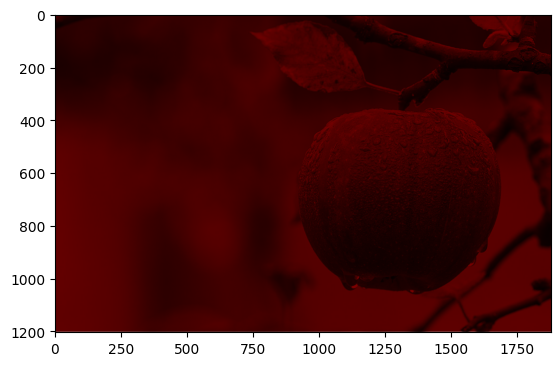

In [ ]:
#divisão escalar

div_img_esc = img1.copy()

div_r, div_g, div_b = 0,0,0
valor_escalar = 2

# Mesma lógica da divisão entre duas imagens
for y in range(0, (altura1-1)):
  for x in range(0,(largura1 -1)):
    R1,G1,B1 = img1[y][x]
    if(R1 == 0 or valor_escalar == 0):
      div_r = 0
    elif(R1 != 0 and valor_escalar != 0):
      div_r = R1//valor_escalar
    elif(G1 == 0 or valor_escalar == 0):
      div_g = 0
    elif(G1 != 0 and valor_escalar != 0):
      div_g = G1//valor_escalar
    elif(B1 == 0 or valor_escalar == 0):
      div_b = 0
    else:
      div_b = B1//valor_escalar

    div_img_esc[y][x] = div_r,div_g, div_b

plt.imshow(div_img_esc)
plt.show()


# Limiarização

---






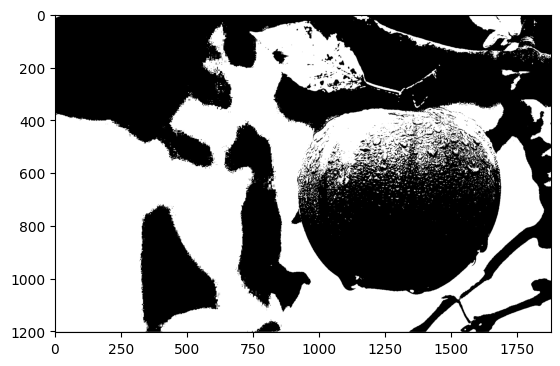

In [ ]:
#Limiarização

lim = img1.copy()

#Defino um limiar
limiar = 127

#Percorro a imagem
for y in range(0, (altura1-1)):
  for x in range(0,(largura1 -1)):
    pixel = lim[y][x]
    valor = sum(pixel) / len(pixel)

    if(valor >= limiar): #Se valor for maior que o meu limiar seta 255 senão 0
      lim[y][x] = 255
    else:
      lim[y][x] = 0

plt.imshow(lim)
plt.show()







# Inverso



---









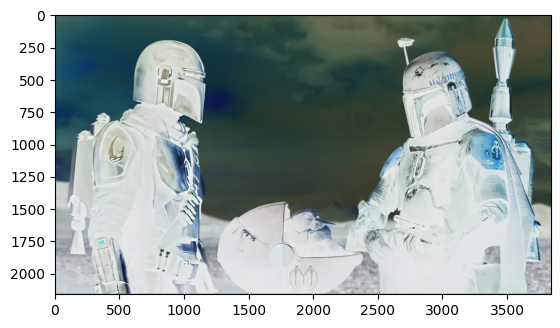

In [ ]:
#inverso
inverso = obj_img.copy()

#percorro a imagem
for y in range(0, (altura-1)):
  for x in range(0,(largura -1)):
    R,G,B = inverso[y][x]

    #Realizo a operação
    inv_r = 255 - R
    inv_g = 255 - G
    inv_b = 255 - B

    inverso[y][x] = inv_r,inv_g, inv_b


plt.imshow(inverso)
plt.show()



# Convulsão simples com Kernel no centro


---



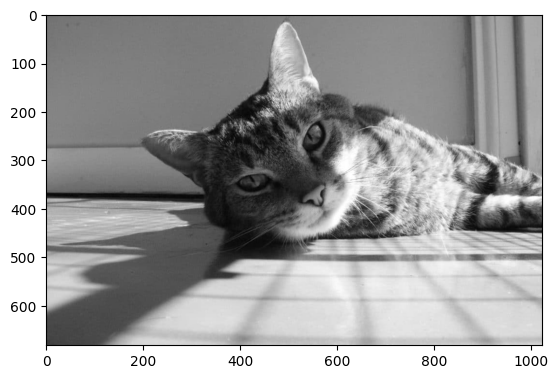

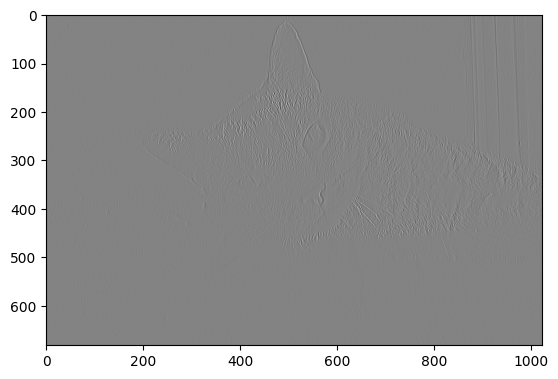

In [ ]:
# convulsão simples com Kernel no centro

# Carregar a imagem
imagem = cv2.imread('gatocinza.jpg')

# Definir o kernel de convolução
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Definir as dimensões da imagem e do kernel
altura= imagem.shape[0]
largura= imagem.shape[1]
altura_kernel, largura_kernel = kernel.shape

# Criar uma nova imagem para o resultado
imagem_saida = np.zeros(imagem.shape)

# Percorrer cada pixel da imagem
for i in range(altura):
    for j in range(largura):
        # Definir as coordenadas do pixel central
        x_inicio = i - altura_kernel // 2
        x_fim = i + altura_kernel // 2 + 1
        y_inicio = j - largura_kernel // 2
        y_fim = j + largura_kernel // 2 + 1

        # Verificar se as coordenadas estão dentro da imagem
        if x_inicio < 0 or x_fim > altura or y_inicio < 0 or y_fim > largura:
            continue

        # Obter a submatriz correspondente ao pixel central
        submatriz = imagem[x_inicio:x_fim, y_inicio:y_fim]

        # Realizar a convolução com o kernel
        convolucao = np.sum(submatriz * kernel)

        # Atribuir o resultado à imagem de saída
        imagem_saida[i, j] = convolucao

# Normalizar os valores da imagem de saída
imagem_saida = cv2.normalize(imagem_saida, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Exibir a imagem de entrada e a imagem de saída
plt.imshow(imagem)
plt.show()

plt.imshow(imagem_saida)
plt.show()



# Convulsão simples, qualquer elemento estruturante

---


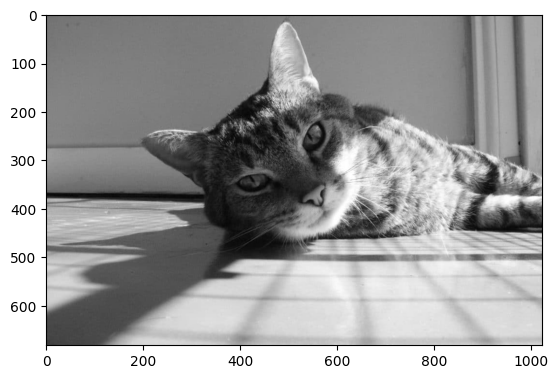

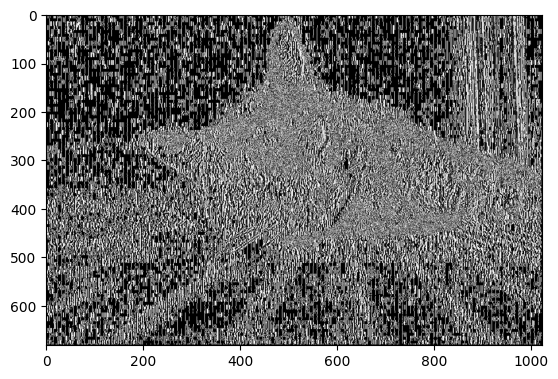

In [ ]:
#Convulsão simples, qualquer elemento estruturante

# Definir o elemento estruturante
elemento_estruturante = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Definir as dimensões da imagem e do elemento estruturante
altura_imagem= imagem.shape[0]
largura_imagem= imagem.shape[1]
altura_estruturante, largura_estruturante = elemento_estruturante.shape

# Criar uma nova imagem para o resultado
imagem_saida = np.zeros(imagem.shape, dtype=np.uint8)

# Percorrer cada pixel da imagem
for i in range(altura_imagem):
    for j in range(largura_imagem):
        # Definir as coordenadas do pixel central
        x_inicio = i - altura_estruturante // 2
        x_fim = i + altura_estruturante // 2 + 1
        y_inicio = j - largura_estruturante // 2
        y_fim = j + largura_estruturante // 2 + 1

        # Verificar se as coordenadas estão dentro da imagem
        if x_inicio < 0 or x_fim > altura_imagem or y_inicio < 0 or y_fim > largura_imagem:
            continue

        # Obter a submatriz correspondente ao pixel central
        submatriz = imagem[x_inicio:x_fim, y_inicio:y_fim]

        # Realizar a convolução com o elemento estruturante
        convolucao = np.sum(submatriz * elemento_estruturante)

        # Atribuir o resultado à imagem de saída
        imagem_saida[i, j] = convolucao

# Normalizar os valores da imagem de saída
imagem_saida = cv2.normalize(imagem_saida, None, 0, 255, cv2.NORM_MINMAX)

# Exibir a imagem de entrada e a imagem de saída
plt.imshow(imagem)
plt.show()

plt.imshow(imagem_saida)
plt.show()

# Erosão EXEMPLO


---



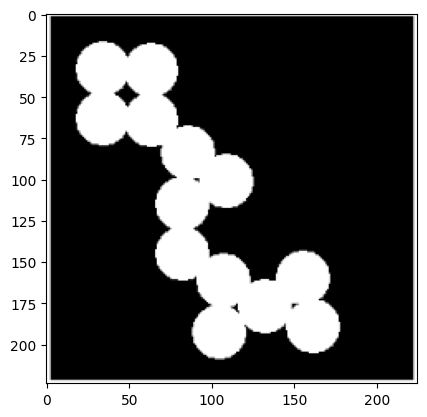

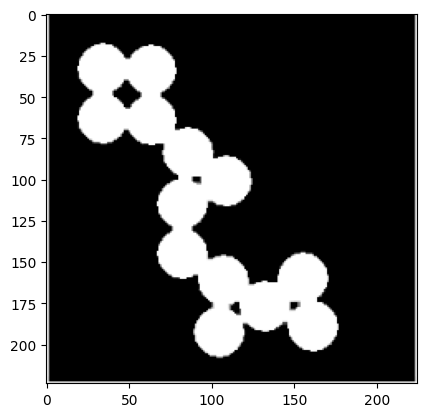

In [ ]:
#Erosão estudando a saída para ter uma base


imagem_binaria = cv2.imread('binaria.png')

# Define o tamanho do elemento estruturante
tamanho_elemento_estruturante = 3

# Cria o elemento estruturante quadrado
elemento_estruturante = np.ones((tamanho_elemento_estruturante, tamanho_elemento_estruturante), np.uint8)

# Aplica a erosão na imagem
imagem_erodida = cv2.erode(imagem_binaria, elemento_estruturante)

# Exibe a imagem original e a imagem erodida
plt.imshow(imagem_binaria)
plt.show()

plt.imshow(imagem_erodida)
plt.show()



# Erosão


---





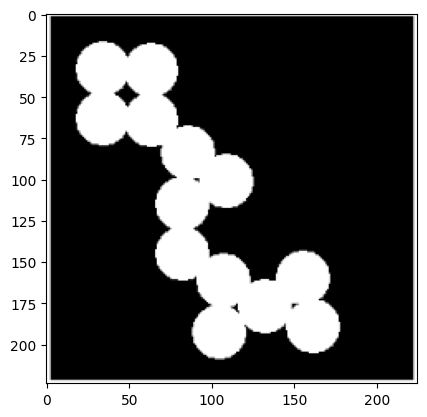

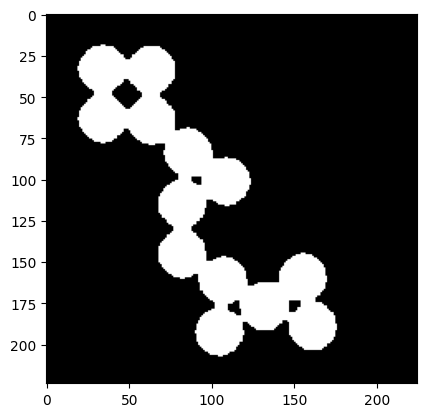

In [ ]:
#erosão (com base no cído passado no material do professor )

# Carrega a imagem em escala de cinza
imagem = cv2.imread('binaria.png')

# Define o tamanho do elemento estruturante
tamanho_elemento_estruturante = 3

# Cria o elemento estruturante quadrado
elemento_estruturante = np.ones((tamanho_elemento_estruturante, tamanho_elemento_estruturante), np.uint8)

def calcula_erosao(imagem, elemento_estruturante):
  tamanho_elemento_estruturante = elemento_estruturante.shape[0]
  # Define o tamanho da imagem
  altura, largura = imagem.shape[:2]

  # Cria uma nova imagem preta com a mesma dimensão da imagem original
  imagem_erodida = np.zeros((altura, largura), np.uint8)

  # Percorre a imagem original pixel a pixel
  for i in range(tamanho_elemento_estruturante // 2, altura - tamanho_elemento_estruturante // 2):
      for j in range(tamanho_elemento_estruturante // 2, largura - tamanho_elemento_estruturante // 2):
          # Verifica se todos os pixels do elemento estruturante se sobrepõem à imagem original
          #pedaço -> pegando o elemento estruturante e retornando os vizinhos de acordo com o elemento estruturante
          pedaco = imagem[i - tamanho_elemento_estruturante // 2:i + tamanho_elemento_estruturante // 2 + 1, j - tamanho_elemento_estruturante // 2:j + tamanho_elemento_estruturante // 2 + 1]
          if np.all(pedaco == 255): #verifica se todos os elementos contidos em pedaço são iguais a 255
              imagem_erodida[i, j] = 255
  return imagem_erodida

imagem_erodida = calcula_erosao(imagem, elemento_estruturante)
# Exibe a imagem original e a imagem erodida
plt.imshow(imagem)
plt.show()

plt.imshow(imagem_erodida, cmap='gray')
plt.show()



# Dilatação EXEMPLO

---



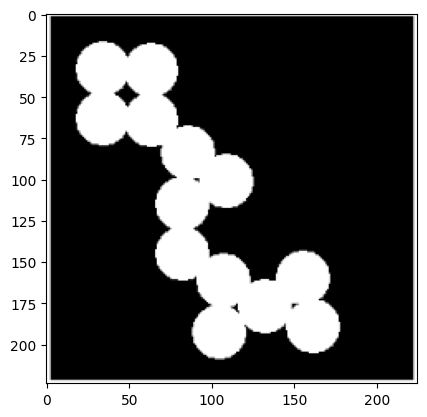

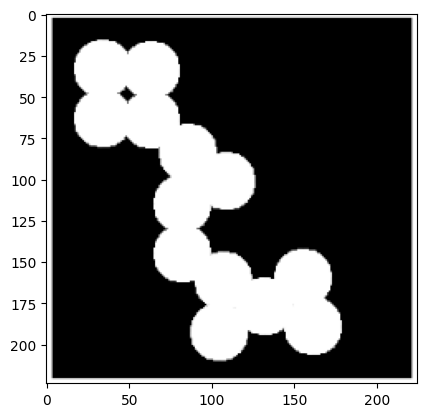

In [ ]:
#dilatação com biblioteca pronta

# Carrega a imagem em escala de cinza
imagem = cv2.imread('binaria.png')

# Define o tamanho do elemento estruturante
tamanho_elemento_estruturante = 3

# Cria o elemento estruturante quadrado
elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_RECT, (tamanho_elemento_estruturante, tamanho_elemento_estruturante))

# Aplica a dilatação na imagem
imagem_dilatada = cv2.dilate(imagem, elemento_estruturante, iterations=1)

# Exibe a imagem original e a imagem dilatada
plt.imshow(imagem)
plt.show()

plt.imshow(imagem_dilatada)
plt.show()


# Dilatação

---




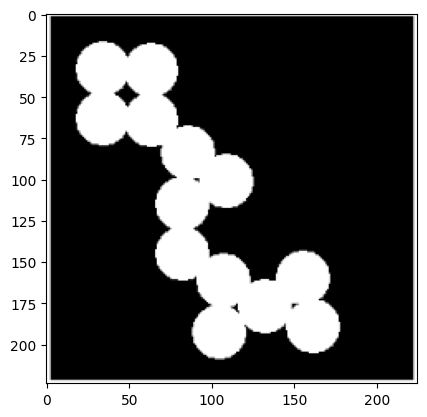

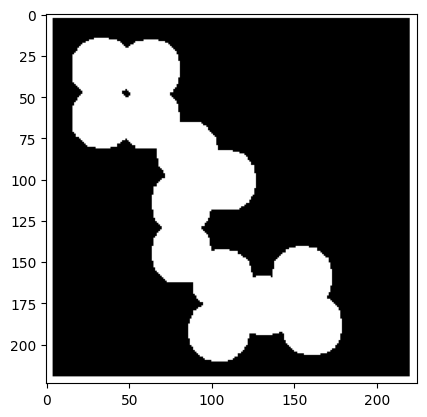

In [ ]:
#dilatação

# Carrega a imagem em escala de cinza
imagem = cv2.imread('binaria.png')

# Define o tamanho do elemento estruturante
tamanho_elemento_estruturante = 3

# Cria o elemento estruturante quadrado
elemento_estruturante = np.ones((tamanho_elemento_estruturante, tamanho_elemento_estruturante), np.uint8)

def calcula_dilatacao(imagem, elemento_estruturante):
  tamanho_elemento_estruturante = elemento_estruturante.shape[0]
  # Obtém as dimensões da imagem
  linhas = imagem.shape[0]
  colunas = imagem.shape[1]

  # Cria uma nova imagem para armazenar a imagem dilatada
  imagem_dilatada = np.zeros((linhas, colunas), np.uint8)

  # Percorre a imagem pixel a pixel
  for i in range(tamanho_elemento_estruturante//2, linhas-tamanho_elemento_estruturante//2):
      for j in range(tamanho_elemento_estruturante//2, colunas-tamanho_elemento_estruturante//2):
          # Verifica se o pixel atual é branco (valor diferente de zero)
          if imagem[i,j].any():
              # Percorre o elemento estruturante pixel a pixel
              for k in range(-tamanho_elemento_estruturante//2, tamanho_elemento_estruturante//2+1):
                  for l in range(-tamanho_elemento_estruturante//2, tamanho_elemento_estruturante//2+1):
                      # Verifica se o pixel do elemento estruturante está dentro dos limites da imagem
                      if (i+k >= 0 and i+k < linhas and j+l >= 0 and j+l < colunas):
                          # Define o valor do pixel correspondente na imagem dilatada como branco (255)
                          imagem_dilatada[i+k,j+l] = 255
  return imagem_dilatada

imagem_dilatada = calcula_dilatacao(imagem, elemento_estruturante)

# Exibe a imagem original e a imagem dilatada
plt.imshow(imagem)
plt.show()

plt.imshow(imagem_dilatada, cmap='gray')
plt.show()


# Abertura

---




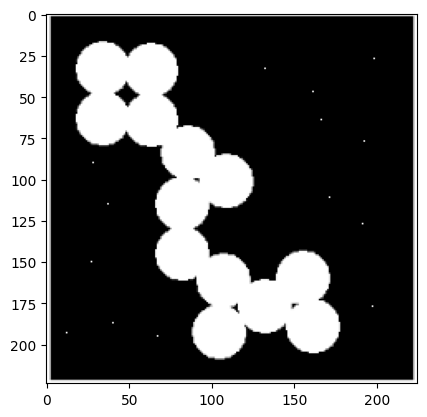

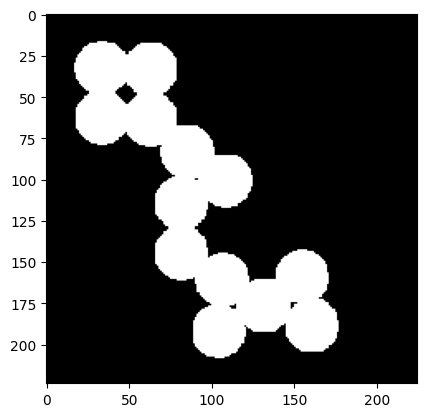

In [ ]:
#abertura

# Lê a imagem em escala de cinza
imagem = cv2.imread('binariacomponto.png')

# Define o tamanho do elemento estruturante
tamanho_elemento_estruturante = 5

# Define o elemento estruturante (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (tamanho_elemento_estruturante, tamanho_elemento_estruturante))

# Aplica a erosão na imagem
imagem_erodida = calcula_erosao(imagem, kernel)

# Aplica a dilatação na imagem erodida
imagem_abertura = calcula_dilatacao(imagem_erodida, kernel)

# Exibe as imagens
plt.imshow(imagem)
plt.show()

plt.imshow(imagem_abertura, cmap= 'gray')
plt.show()

# Fechamento


---




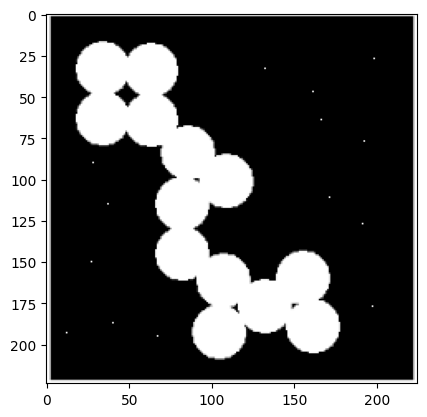

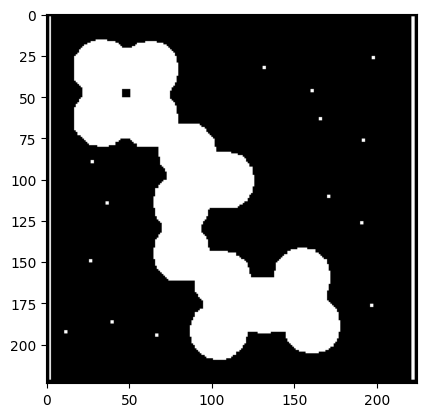

In [ ]:
#fechamento


# Lê a imagem em escala de cinza
imagem = cv2.imread("binariacomponto.png")

# Define o tamanho do elemento estruturante
tamanho_elemento_estruturante = 5

# Define o elemento estruturante (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (tamanho_elemento_estruturante, tamanho_elemento_estruturante))

# Aplica a dilatação na imagem
imagem_dilatada = calcula_dilatacao(imagem, kernel)

# Aplica a erosão na imagem dilatada
imagem_fechamento = calcula_erosao(imagem_dilatada, kernel)

# Exibe as imagens
plt.imshow(imagem)
plt.show()

plt.imshow(imagem_fechamento, cmap= 'gray')
plt.show()


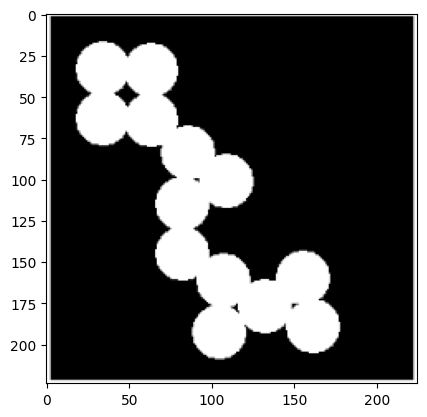

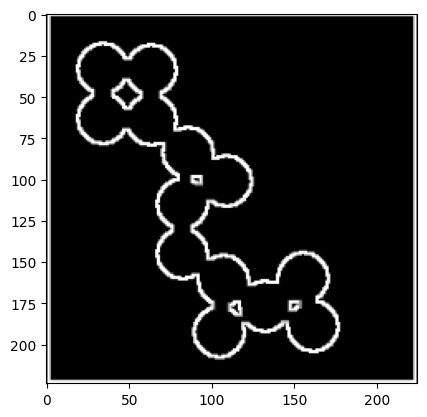

In [ ]:
#Limite interno usando a função subtract para comparar a saída com o código na mão

# Carrega a imagem em escala de cinza
imagem = cv2.imread('binaria.png')

# Define o elemento estruturante utilizado na erosão
kernel = np.ones((5,5), np.uint8)

# Calcula a erosão da imagem
erosao = cv2.erode(imagem, kernel, iterations=1)

# Calcula o limite interno
limite_interno = cv2.subtract(imagem, erosao)

# Exibe a imagem original e o resultado do limite interno
plt.imshow(imagem)
plt.show()

plt.imshow(limite_interno)
plt.show()


# Limite interno


---


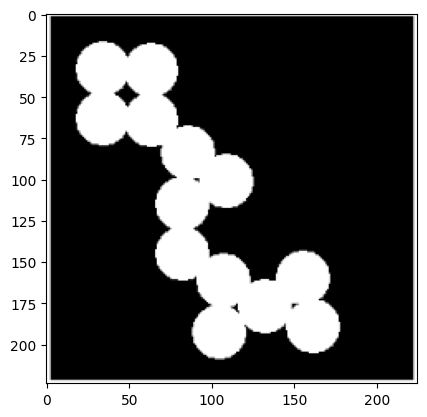

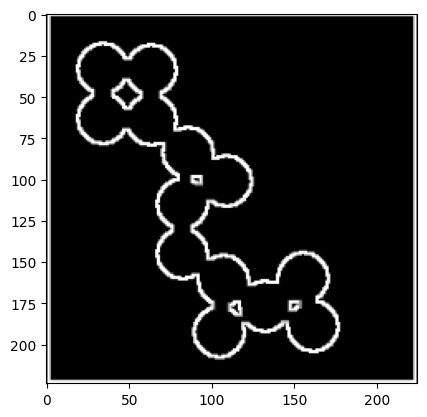

In [ ]:
#Limite interno

# Carrega a imagem em escala de cinza
imagem = cv2.imread('binaria.png')
altura = imagem.shape[0]
largura = imagem.shape[1]
# Define o elemento estruturante utilizado na erosão
kernel = np.ones((5,5), np.uint8)

imagem_calc = imagem.copy()

# Calcula a erosão da imagem
erosao = cv2.erode(img, kernel, iterations=1)

# Calcula o limite interno
for y in range(0, (altura-1)):
  for x in range(0,(largura -1)):
    R3,G3,B3 = imagem[y][x]
    R4,G4,B4 = erosao[y][x]

    sub_r = max(R3,R4) - min(R3,R4)
    sub_g = max(G3,G4) - min(G3,G4)
    sub_b = max(B3,B4) - min(B3,B4)

    imagem_calc[y][x] = [sub_r,sub_g,sub_b]

# Exibe a imagem original e o resultado do limite interno
plt.imshow(imagem)
plt.show()

plt.imshow(limite_interno)
plt.show()

# Limite externo



---


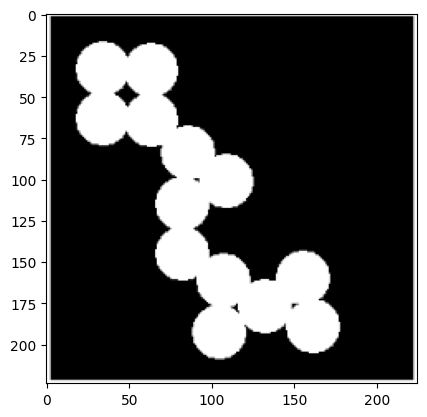

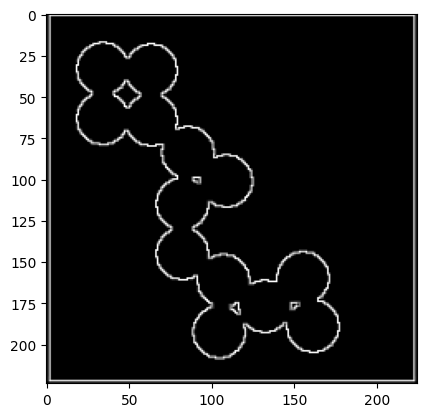

In [ ]:
#Lmite externo

# Carrega a imagem binária
img = cv2.imread("binaria.png")

# Cria um kernel quadrado de tamanho 3x3
kernel = np.ones((3, 3), np.uint8)

# Aplica a operação de erosão na imagem
erosion = cv2.erode(img, kernel, iterations=1)

# Calcula o limite externo subtraindo a imagem erodida da imagem original
external = img - erosion


plt.imshow(img)
plt.show()

plt.imshow(external)
plt.show()

###  Função para substituir o cv2.filter2D

In [ ]:
def aplicar_kernel(imagem, filtro):
    # Obtém as dimensões da imagem e do filtro
    linhas_imagem, colunas_imagem = imagem.shape[:2]
    linhas_filtro, colunas_filtro = filtro.shape[:2]

    # Calcula o tamanho do preenchimento nas bordas da imagem
    borda_vertical = (linhas_filtro - 1) // 2
    borda_horizontal = (colunas_filtro - 1) // 2

    # Preenche as bordas da imagem com zeros
    imagem_preenchida = np.pad(imagem, ((borda_vertical, borda_vertical), (borda_horizontal, borda_horizontal)), mode='constant')

    # Cria uma matriz para guardar o resultado da convolução
    resultado = np.zeros_like(imagem, dtype=np.float32)

    # Percorre cada pixel da imagem
    for i in range(borda_vertical, linhas_imagem + borda_vertical):
        for j in range(borda_horizontal, colunas_imagem + borda_horizontal):
            # Obtém a subimagem que contém o pixel central
            subimagem = imagem_preenchida[i-borda_vertical:i+borda_vertical+1, j-borda_horizontal:j+borda_horizontal+1]

            # Realiza a convolução entre o filtro e a subimagem
            valor = np.sum(subimagem * filtro)

            # Atribui o valor resultante à posição correspondente na matriz resultado
            resultado[i-borda_vertical, j-borda_horizontal] = valor

    return resultado

### Função de auxilio para carregar uma imagem cinza

In [ ]:
def carregar_imagem_cinza(nome_arquivo):
    imagem = cv2.imread(nome_arquivo)
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    plt.imshow(imagem_cinza)
    plt.show()
    imagem_cinza = cv2.normalize(imagem_cinza, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return imagem_cinza

# Segmentação Roberts

---





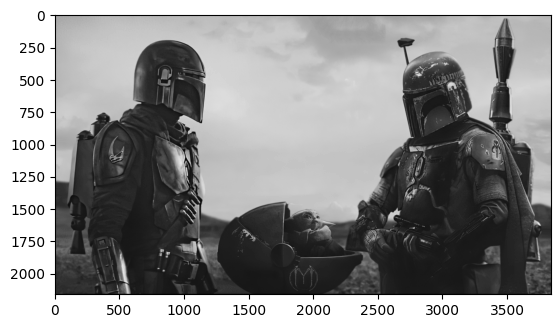

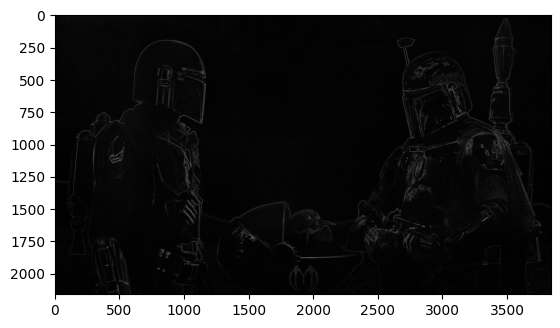

In [ ]:
#Segmentação Roberts

# leitura da imagem
imagem = imagem_escala_cinza.copy()

# criação dos kernels de Roberts
kernelx = np.array([[-1, 0], [0, 1]], dtype=np.float32)
kernely = np.array([[0, -1], [1, 0]], dtype=np.float32)

# criação de matrizes com zeros para guardar os resultados das convoluções
grad_x = np.zeros_like(imagem, dtype=np.float32)
grad_y = np.zeros_like(imagem, dtype=np.float32)

# aplicação da convolução com os kernels de Roberts
for i in range(1, imagem.shape[0]-1):
    for j in range(1, imagem.shape[1]-1):
        grad_x[i,j] = np.sum(kernelx * imagem[i-1:i+1,j-1:j+1])
        grad_y[i,j] = np.sum(kernely * imagem[i-1:i+1,j-1:j+1])

# cálculo do módulo do gradiente
gradiente = np.sqrt(np.square(grad_x) + np.square(grad_y))

# exibição da imagem resultante
plt.imshow(imagem, cmap= 'gray')
plt.show()

plt.imshow(gradiente, cmap = 'gray')
plt.show()



# Segmentação Sobel EXEMPLO

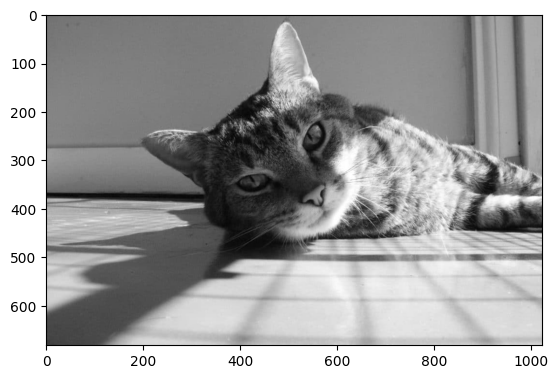

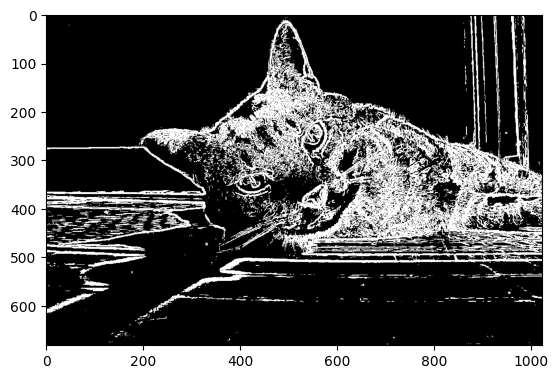

In [ ]:
#Segmentação Sobel com função cv2

import cv2
import numpy as np

# Carrega a imagem em escala de cinza
img = cv2.imread("gatocinza.jpg")

# Aplica o operador Sobel nas direções horizontal e vertical
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcula a magnitude do gradiente
mag = np.sqrt(sobelx**2 + sobely**2)

# Aplica um limiar para binarizar a imagem
threshold_value = 50
ret, thresholded = cv2.threshold(mag, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(img)
plt.show()

plt.imshow(thresholded)
plt.show()


# Segmentação Sobel




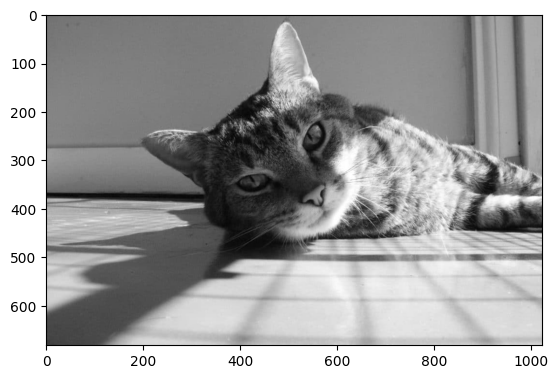

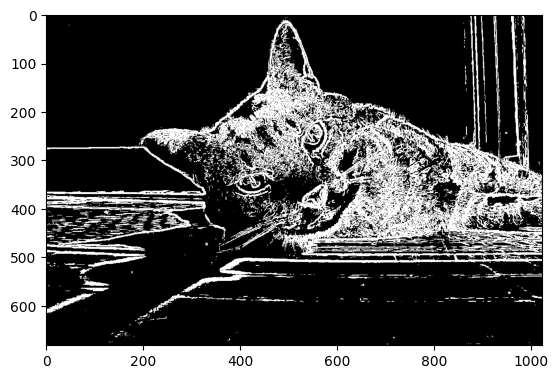

In [ ]:
#Segmentação Sobel


# Carrega a imagem em escala de cinza
img = cv2.imread("gatocinza.jpg")

# Define os kernels Sobel para as direções horizontal e vertical
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Aplica a convolução com os kernels Sobel
grad_x = cv2.filter2D(img, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, sobel_y)

# Calcula a magnitude do gradiente
mag = np.sqrt(grad_x**2 + grad_y**2)

# Aplica um limiar para binarizar a imagem
threshold_value = 50
ret, thresholded = cv2.threshold(mag, threshold_value, 255, cv2.THRESH_BINARY)

# Mostra a imagem original e a imagem binarizada
plt.imshow(img)
plt.show()

plt.imshow(thresholded)
plt.show()



# Segmentação de Robinson

---


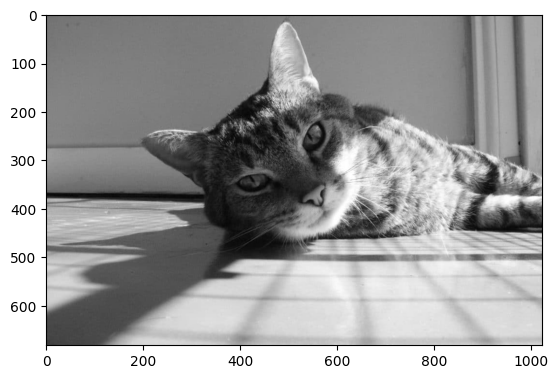

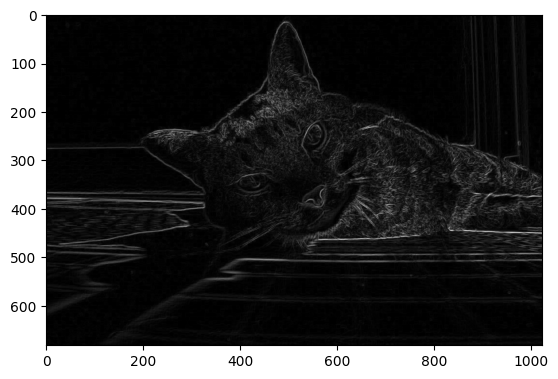

In [ ]:
#Segmentação de Robinson

import cv2
import numpy as np

# Define os kernels de Robinson para cada direção
robinson_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
robinson_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
robinson_xy = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])
robinson_yx = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
robinson_plus = np.array([[1, 1, 1], [1, -2, 1], [-1, -1, -1]])
robinson_minus = np.array([[-1, -1, -1], [1, -2, 1], [1, 1, 1]])
robinson_L = np.array([[1, 1, 1], [1, -2, -1], [1, -1, -1]])
robinson_R = np.array([[-1, -1, 1], [-1, -2, 1], [1, 1, 1]])

# Carrega a imagem em escala de cinza
img = cv2.imread('gatocinza.jpg')

# Aplica a convolução com os kernels de Robinson
robinson1 = cv2.filter2D(img, cv2.CV_32F, robinson_x)
robinson2 = cv2.filter2D(img, cv2.CV_32F, robinson_y)
robinson3 = cv2.filter2D(img, cv2.CV_32F, robinson_xy)
robinson4 = cv2.filter2D(img, cv2.CV_32F, robinson_yx)
robinson5 = cv2.filter2D(img, cv2.CV_32F, robinson_plus)
robinson6 = cv2.filter2D(img, cv2.CV_32F, robinson_minus)
robinson7 = cv2.filter2D(img, cv2.CV_32F, robinson_L)
robinson8 = cv2.filter2D(img, cv2.CV_32F, robinson_R)

# Calcula a magnitude da borda para cada direção
magnitude = np.abs(robinson1) * 0.125 + np.abs(robinson2) * 0.125 + np.abs(robinson3) * 0.125 + \
            np.abs(robinson4) * 0.125 + np.abs(robinson5) * 0.125 + np.abs(robinson6) * 0.125 + \
            np.abs(robinson7) * 0.125 + np.abs(robinson8) * 0.125

# Normaliza a magnitude para o intervalo [0, 255]
magnitude = cv2.normalize(magnitude, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Exibe a imagem resultante
plt.imshow(img)
plt.show()

plt.imshow(magnitude)
plt.show()



# Refêrencias



---

https://docs.opencv.org/4.x/

https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

https://www.askpython.com/python-modules/opencv-filter2d

https://docs.opencv.org/3.4/d3/d50/group__imgproc__colormap.html

https://pypi.org/project/cmapy/

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

https://www.pythonpool.com/cv2-normalize/

